# QC experiments Genome Tracks 

In [1]:
!date

Fri Aug 16 14:38:43 PDT 2024


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/pygenometracks_2


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pygenometracks import tracks

import scanpy as sc

In [34]:
# GTF_input='/c4/home/derek/data1/derek/reference/human_hp3_reference/genes/genes.gtf'

GTF_input='/c4/home/derek/data1/derek/reference/refdata-gex-GRCm39-2024-A/genes/genes.gtf'

GTF = pd.read_csv(GTF_input,sep='\t',comment='#',header=None,names=['seqname', 'source', 'feature', 'start' , 'end', 'score', 'strand', 'frame', 'attribute'])


coord_dict = {}

for index, line in GTF.iterrows():
    if line['feature'] == 'gene':

        attribute_list = line['attribute'].split(';')
    
        gene_name = [i for i in attribute_list if i.startswith(' gene_name')][0].split('"')[1]
    
        coordinate = str(line['seqname'])+':'+str(line['start'])+'-'+str(line['end'])
    
        coord_dict[gene_name] = coordinate
    else:
        pass

In [5]:
# %%bash
# working_dir=/media/chang/HDD-4/derek/SLR/data/20210707/sinto_outs/

# ##get bed file of exons
# exon_bedfile=/home/derek/analysis_4/SLR/resources/exons.bed


# ##only output alignments overlapping the exon bedfile 
# samtools view -bh -L $exon_bedfile $working_dir/OPC.bam> $working_dir/OPC.exons.bam ; samtools index $working_dir/OPC.exons.bam

In [6]:
# %%bash
# generate bigwig files from bams

# working_dir=./T4_Mem_outs/

# bamCoverage\
#     --bam $working_dir/T4_Mem.bam \
#     --outFileName $working_dir/T4_Mem_CD45.bw \
#     --ignoreDuplicates \
#     --binSize 1 \
#     --region chr1:198638457:198757476


In [7]:
##create pyGenomeTracks configuration file

In [19]:
pwd

'/nowakowskilab/data1/derek/scSLR/notebooks/fig1'

In [9]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [10]:
sns.color_palette("bright")[0]

(0.00784313725490196, 0.24313725490196078, 1.0)

In [11]:
#merged_complete_5prime_dedup.bedgraph 

In [12]:
ls -lt /c4/home/derek/data1/derek/data_scSLR/PBMC/BIGWIG_files/

total 1256744
drwxr-xr-x 2 derek nowakowskilab      4096 Jul  8 12:46 no_dedup/
-rw-r--r-- 1 derek nowakowskilab 542686138 Mar 24  2023 merged_complete_internal_dedup.bedgraph
-rw-r--r-- 1 derek nowakowskilab 471792658 Mar 24  2023 merged_complete_5prime_dedup.bedgraph
-rw-r--r-- 1 derek nowakowskilab  75450829 Mar 24  2023 sample2_complete_internal_dedup.bw
-rw-r--r-- 1 derek nowakowskilab  64516916 Mar 24  2023 sample2_complete_5prime_dedup.bw
-rw-r--r-- 1 derek nowakowskilab  66922361 Jan 10  2023 sample1_complete_5prime_dedup.bw
-rw-r--r-- 1 derek nowakowskilab  65521540 Jan 10  2023 sample1_complete_internal_dedup.bw


In [13]:
#/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/UMItools_dedup_outs/5prime/merged_complete_shared_5prime.bw

In [49]:
%%writefile bigwig_initial_test.ini


[spacer]
height = 0.1

# [bigwig file test]
# file = /c4/home/derek/data1/derek/data_scSLR/PBMC/BIGWIG_files/no_dedup/sample2_5prime_merged_dedup.bw
# color = (0.00784313725490196, 0.24313725490196078, 1.0)
# # height of the track in cm (optional value)
# height = 4
# #title = 5prime
# min_value = 0
# # max_value = 25000
# alpha = 1
# #operation = log10((1 + file))
# # overlay_previous = share-y
# type = line:2
# #type = fill
# use_middle = true


# [bigwig file test]
# file =  /c4/home/derek/data1/derek/data_scSLR/PBMC/BIGWIG_files/no_dedup/sample2_internal_merged_dedup.bw
# color = (0.9098039215686274, 0.0, 0.043137254901960784) 
# # height of the track in cm (optional value)
# height = 4
# #title = internal
# min_value = 0
# # max_value = 10000000
# alpha = 1
# #operation = log10((1 + file))
# overlay_previous = share-y
# type = line:2
# #type = fill
# use_middle = true


[bigwig file test]
file =  /c4/home/derek/data1/derek/reference/VASA/SRR14783082_STAR_outs/Aligned.sortedByCoord.sort.bw
color = (0.9098039215686274, 0.0, 0.043137254901960784) 
# height of the track in cm (optional value)
height = 4
#title = internal
# min_value = 0
# max_value = 10000000
# alpha = 1
#operation = log10((1 + file))
# overlay_previous = share-y
# type = line:2
type = fill
use_middle = true


# [spacer]
# height = 1





[spacer]
height = 0.5

[genes]
color = black  
# file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
file = /c4/home/derek/data1/derek/reference/refdata-gex-GRCm39-2024-A/genes/genes.gtf
height = 3
# title = gtf
fontsize = 8
file_type = gtf
gene_rows = 10

[x-axis]
fontsize=10


Overwriting bigwig_initial_test.ini


In [80]:
[i for i in coord_dict.keys() if i.startswith('Kif3')]

['Kif3b', 'Kif3a', 'Kif3c']

In [44]:
#PTPRC 'chr1:198638457-198757476'

In [85]:
coord = coord_dict['Kif3b']

In [86]:
# coord = 'chr12:6536500-6538374'

In [87]:
%%bash -s "$coord"

coord=$1

pyGenomeTracks --tracks bigwig_initial_test.ini \
               --region $coord \
               -o bigwig_test.png \
                # --decreasingXAxis




INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [spacer]
INFO:pygenometracks.tracksClass:initialize 4. [genes]
100%|██████████| 33/33 [00:00<00:00, 1118.24it/s]
INFO:pygenometracks.tracksClass:initialize 5. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:4.727173566818237
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 12.606382978723405. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [spacer]
INFO:pygenometracks.tracksClass:plotting 4. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 24.08,-0.08
INFO:pygenometracks.tracksClass:plotting 5. [x-axis]


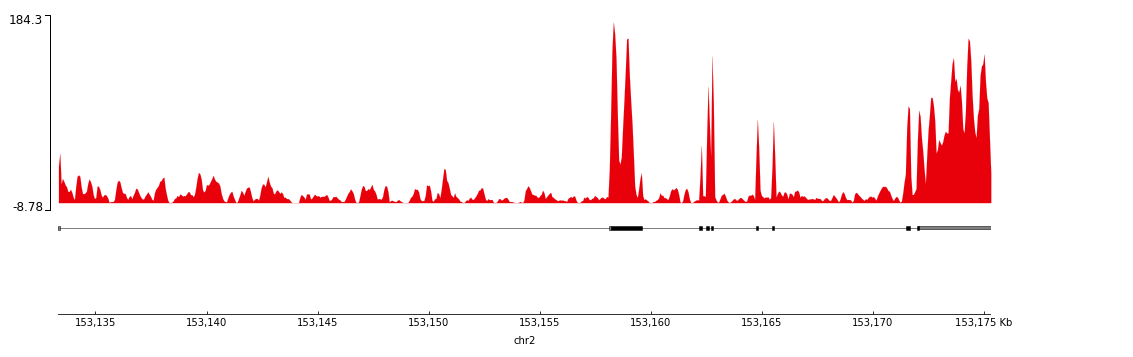

In [88]:
from IPython.display import Image
Image(filename='bigwig_test.png')

In [89]:
%%bash -s "$coord"

coord=$1

pyGenomeTracks --tracks bigwig_initial_test.ini \
               --region chr5:133102554-133104864 \
               -o bigwig_test.png \
                --decreasingXAxis




INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [spacer]
INFO:pygenometracks.tracksClass:initialize 4. [genes]
0it [00:00, ?it/s]

INFO:pygenometracks.tracksClass:initialize 5. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:4.422418594360352
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 12.606382978723405. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [spacer]
INFO:pygenometracks.tracksClass:plotting 4. [genes]
No interval was found when overlapping with both chr5:133002554-133204864 and 5:133002554-133204864 inside the bed file. This will generate an empty track!!

INFO:pygenometracks.tracksClass:plotting 5. [x-axis]


In [22]:
%%bash -s "$coord"

coord=$1

pyGenomeTracks --tracks bigwig_initial_test.ini \
               --region  $coord \
               -o ./plots/HNRNPA1.pdf \
                # --decreasingXAxis





INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████| 166/166 [00:00<00:00, 738.95it/s]
INFO:pygenometracks.tracksClass:initialize 6. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:7.691610336303711
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 9.414893617021276. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 4. [spacer]
INFO:pygenometracks.tracksClass:plotting 5. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 24.08,-0.08
INFO:pygenometracks.tracksClass:plotting 6. [x-ax

In [23]:
# from IPython.display import Image
# Image(filename='bigwig_GAPDH.png',)

In [24]:
%%bash
pyGenomeTracks --tracks bigwig_initial_test.ini --region 'chr12:6534512-6538374' -o bigwig_test.png   

#pyGenomeTracks --tracks bigwig_initial_test.ini --region 'chr1:198692000-198704000' -o bigwig_PTPRC.png 





INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████| 166/166 [00:00<00:00, 740.61it/s]
INFO:pygenometracks.tracksClass:initialize 6. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:7.66900897026062
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 9.414893617021276. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 4. [spacer]
INFO:pygenometracks.tracksClass:plotting 5. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 24.08,-0.08
INFO:pygenometracks.tracksClass:plotting 6. [x-axi

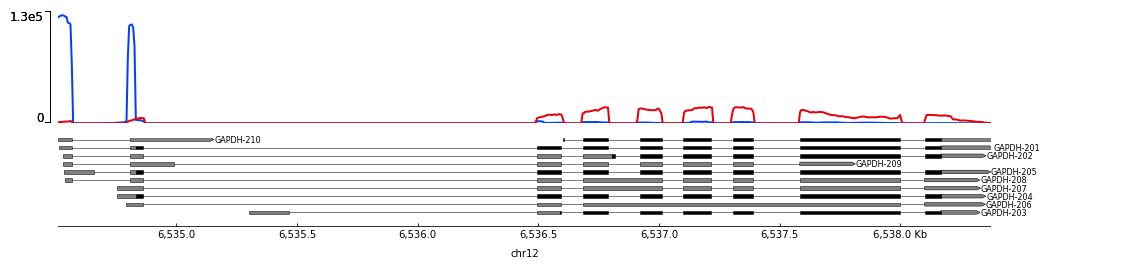

In [25]:
from IPython.display import Image
Image(filename='bigwig_test.png',)

In [26]:
%%bash
pyGenomeTracks --tracks bigwig_initial_test.ini --region 'chr1:198638457-198725000' -o bigwig_test.png 





INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████| 26/26 [00:00<00:00, 884.92it/s]
INFO:pygenometracks.tracksClass:initialize 6. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:6.135711431503296
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 9.414893617021276. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 4. [spacer]
INFO:pygenometracks.tracksClass:plotting 5. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 24.08,-0.08
INFO:pygenometracks.tracksClass:plotting 6. [x-axis

In [27]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/pygenometracks_2:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
aiofiles                  22.1.0             pyhd8ed1ab_0    conda-forge
aiosqlite                 0.19.0             pyhd8ed1ab_0    conda-forge
anndata                   0.8.0                    pypi_0    pypi
anyio                     3.7.1              pyhd8ed1ab_0    conda-forge
argcomplete               3.0.8              pyhd8ed1ab_0    conda-forge
argh                      0.27.2             pyhd8ed1ab_0    conda-forge
argon2-cffi               23.1.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py37h540881e_2    conda-forge
arrow                     1.2.3              pyhd8ed1ab_0    conda-forge
asciitree                 0.3.3                      py_2